# Initial Data Exploration and Cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scr.data_processing import *

In [3]:
# Load the raw data
job_df = process_all_csv_files()
print(f"Dataset shape: {job_df.shape}")
print(f"Columns: {list(job_df.columns)}")

Found 7 CSV files to process
Processing: adzuna_jobs.csv
  Found 15 rows
  Extracting text from HTML descriptions...
  Extracting skills from descriptions...
  Found skills in 0 out of 15 rows
Processing: ARBEITNOW_JOBS.csv
  Found 100 rows
  Extracting text from HTML descriptions...
  Extracting skills from descriptions...
  Found skills in 47 out of 100 rows
Processing: GREENHOUSE_JOBS.csv
  Found 2187 rows
  Extracting text from HTML descriptions...


c:\Users\MARIE\Desktop\scrape job details\scr\data_processing.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(description, 'html.parser')


  Extracting skills from descriptions...
  Found skills in 1362 out of 2187 rows
Processing: LEVER_JOBS.csv
  Found 1788 rows
  Extracting text from HTML descriptions...
  Extracting skills from descriptions...
  Found skills in 137 out of 1788 rows
Processing: REMOTEOK_JOBS.csv
  Found 98 rows
  Extracting text from HTML descriptions...
  Extracting skills from descriptions...
  Found skills in 57 out of 98 rows
Processing: REMOTIVE_JOBS.csv
  Found 1485 rows
  Extracting text from HTML descriptions...
  Extracting skills from descriptions...
  Found skills in 845 out of 1485 rows
Processing: usajobs_data.csv
  Found 131 rows
  Extracting text from HTML descriptions...
  Extracting skills from descriptions...


c:\Users\MARIE\Desktop\scrape job details\scr\data_processing.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(description, 'html.parser')


  Found skills in 3 out of 131 rows
Concatenating all processed data...
Final consolidated dataset: 523 rows
Saving consolidated data to data/processed/cleaned_job_data.csv
Dataset shape: (523, 8)
Columns: ['company', 'title', 'title_category', 'location', 'url', 'description', 'skills', 'source']


In [4]:
# Display first few rows
print("\nFirst 5 rows:")
display(job_df.head())


First 5 rows:


,company,title,title_category,location,url,description,skills,source
2,Apaleo,Senior Analytics Engineer (f/m/d),Senior Analytics Engineer,"München, Bavaria, Germany",https://www.arbeitnow.com/jobs/companies/apale...,Join Apaleo and shape the future of Hospitalit...,"[python, sql, kafka, airflow, snowflake, redsh...",arbeitnow
23,Greening Group Deutschland,Projektingenieur:in - Angebotsabteilung Photov...,Mid Other Data Role,Düsseldorf,https://www.arbeitnow.com/jobs/companies/green...,Wir suchen einen qualifizierten Angebotsingeni...,[excel],arbeitnow
47,Khanacademy,Data Engineering & Analytics Lead,Senior Other Data Role,"Gurgaon, India",https://job-boards.greenhouse.io/khanacademy/j...,ABOUT KHAN ACADEMY Khan Academy is a fast-pace...,"[python, r, sql, bigquery, machine learning, d...",khanacademy
48,Khanacademy,AI Engineer (12 months or 18 months fixed-term),Mid AI Engineer,"Mountain View, CA / Remote friendly (US)",https://job-boards.greenhouse.io/khanacademy/j...,ABOUT KHAN ACADEMY Khan Academy is a nonprofit...,"[python, machine learning, natural language pr...",khanacademy
49,Khanacademy,Data Management Associate - Partner Operations,Junior Other Data Role,"Delhi, Gurgaon, Noida (Remote Friendly)",https://job-boards.greenhouse.io/khanacademy/j...,ABOUT KHAN ACADEMY Khan Academy is a fast-pace...,[excel],khanacademy


In [5]:
# Check job title distribution
print("\nJob Title Distribution:")
title_counts = job_df['title'].value_counts()
print(f"Unique job titles: {len(title_counts)}")
print(f"Top 10 job titles:")
print(title_counts.head(10))


Job Title Distribution:
Unique job titles: 448
Top 10 job titles:
title
Senior Data Scientist                            9
Data Scientist                                   7
Staff Machine Learning Engineer                  6
Senior Data Engineer                             6
Data Analyst                                     5
Data Engineer                                    4
Senior Machine Learning Engineer                 3
Data Science Intern                              3
Data Science Intern, Algorithms (Summer 2026)    3
Machine Learning Engineer, Ads                   2
Name: count, dtype: int64


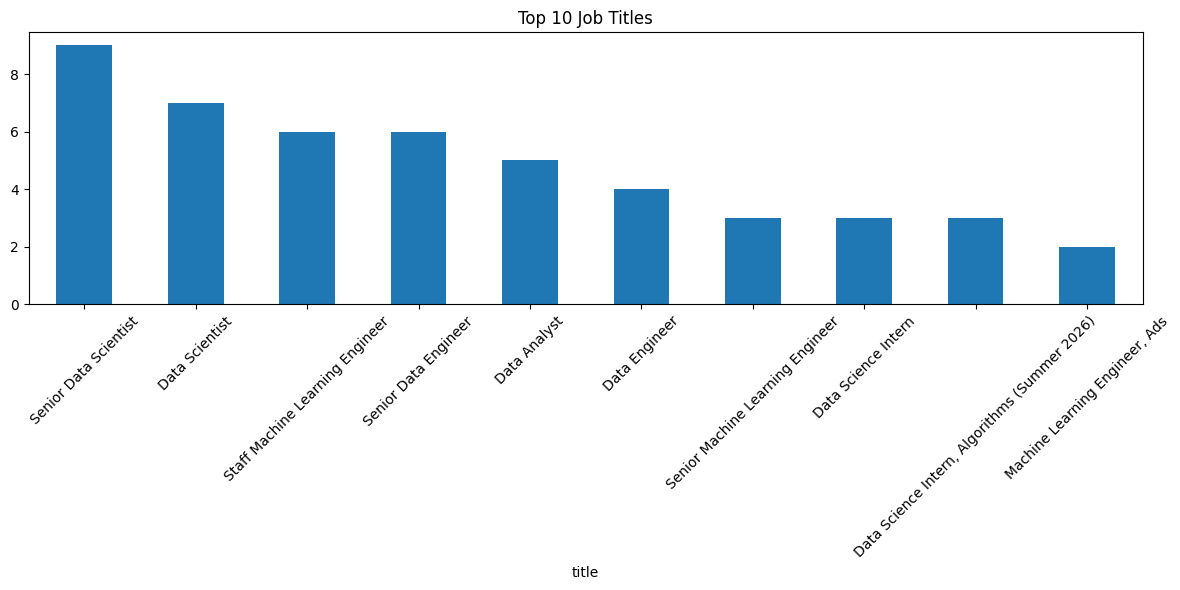

In [6]:
# Basic visualizations
plt.figure(figsize=(12, 6))
title_counts.head(10).plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Check skills column format
print("\nSkills column sample:")
print(job_df['skills'].head(3))
print(f"Skills column type: {type(job_df['skills'].iloc[0])}")


Skills column sample:
2     [python, sql, kafka, airflow, snowflake, redsh...
23                                              [excel]
47    [python, r, sql, bigquery, machine learning, d...
Name: skills, dtype: object
Skills column type: <class 'list'>


In [8]:
job_df['title_category'].value_counts()

title_category
Senior Other Data Role                  181
Senior Machine Learning Engineer         72
Mid Other Data Role                      64
Senior Data Scientist                    37
Mid Data Scientist                       30
Senior Data Engineer                     26
Mid Data Analyst                         17
Mid Machine Learning Engineer            17
Mid Data Engineer                        16
Senior AI Engineer                       14
Mid AI Engineer                          10
Mid Data Science General                  9
Junior Other Data Role                    6
Senior Analytics Engineer                 6
Mid Research Scientist                    4
Senior Data Analyst                       4
Senior Data Science General               3
Mid Business Intelligence Analyst         2
Senior Business Intelligence Analyst      2
Senior Data Architect                     1
Mid Analytics Engineer                    1
Mid Data Architect                        1
Name: count, dtyp

In [9]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 2 to 2446
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         523 non-null    object
 1   title           523 non-null    object
 2   title_category  523 non-null    object
 3   location        523 non-null    object
 4   url             523 non-null    object
 5   description     523 non-null    object
 6   skills          523 non-null    object
 7   source          523 non-null    object
dtypes: object(8)
memory usage: 36.8+ KB
